# Spam Detection

**Import**

Source : https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [0]:
import pandas as pd

df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Data preprocessing**

In [0]:
# Removing of empty columns

data = df[[i for i in df.columns if i not in ['Unnamed: 2','Unnamed: 3','Unnamed: 4']]]

# Renamming of columns

data = data.rename(columns={'v1': 'spam', 'v2': 'text'})

# Label encoding of text status

data.spam.replace(['spam', 'ham'], [1, 0], inplace=True)


data.head(5)

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Here we put in lowercause all characteres to make easier the stopwords removing 

In [0]:
for i in range(0, len(data)) :
  data['text'][i] = data['text'][i].lower()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
data.head(5)

,spam,text
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


**Distribution**

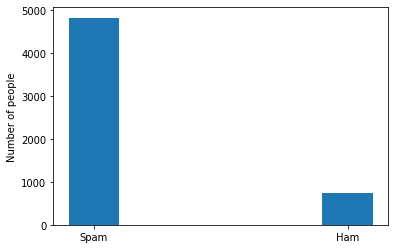

In [0]:
import matplotlib.pyplot as plt

spam= len(data[data['spam']==0])
ham= len(data[data['spam']==1])

y= [spam,ham]
x= ['Spam','Ham']

plt.xlabel('')
plt.ylabel('Number of people')
plt.bar(x,y,width=0.20)
plt.show()

**Tokenization**

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

data_token = data

data_token['text'] = data['text'].apply(word_tokenize)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
data_token.head()

,spam,text
0,0,"[go, until, jurong, point, ,, crazy.., availab..."
1,0,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,1,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,0,"[nah, i, do, n't, think, he, goes, to, usf, ,,..."


In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
# Stopwords list
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [0]:
df_clean = pd.DataFrame()

for text in range (0, len(data_token)) : 
  for stopword in stopwords.words('english') :
    try : # When a word is not in the list we have an error then we have to use try/except
      data_token['text'][text].remove(stopword)
    except ValueError:
      pass 
df_clean = data_token

In [0]:
df_clean.head(5)

,spam,text
0,0,"[go, jurong, point, ,, crazy.., available, bug..."
1,0,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,1,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,"[u, dun, say, early, hor, ..., u, c, already, ..."
4,0,"[nah, n't, think, goes, usf, ,, he, lives, aro..."


**Lemmatization**

In [0]:
import numpy as np
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
  


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
lemmatizer = WordNetLemmatizer()


lem_list = []

for text_token in df_clean['text']:
  text_lem = [lemmatizer.lemmatize(i) for i in text_token]
  lem_list.append(text_lem)
  
data_lemma = df_clean

data_lemma['text'] = lem_list

**Data split**

In [0]:
from sklearn.model_selection import train_test_split


xtrain, xtest, ytrain, ytest = train_test_split(data_lemma, data['spam'], train_size=0.7, random_state=1)

In [0]:
xtrain.head()

,spam,text
4393,0,"[baaaaaaaabe, !, wake, !, miss, !, i, crave, y..."
216,0,"[tired, ., n't, slept, well, past, night, .]"
4471,1,"[3., received, mobile, content, ., enjoy]"
3889,1,"[double, min, &, 1000, txts, orange, tariff, ...."
5030,0,"[hey, ..., inconvenient, si, huh, ?]"


**TF-IDF**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

TfidfVectorizer = TfidfVectorizer(stop_words='english')

#Train

text_to_array = [''.join(i) for i in xtrain['text']]


xtrain['text'] = text_to_array

xtrain = TfidfVectorizer.fit_transform(xtrain['text'])

# Test

text_to_array = [''.join(i) for i in xtest['text']]


xtest['text'] = text_to_array

xtest = TfidfVectorizer.transform(xtest['text']) # You replace fit_transform by transform and the matrix will have the same shape of the training data



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**Modelisation with SVM**

In [0]:
from sklearn.svm import SVC

model = SVC(kernel = 'rbf', C = 1000,gamma=1e-4, probability=True, random_state=1)
model.fit(xtrain, ytrain)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
from sklearn import metrics

acc_train =model.score(xtrain,ytrain)
acc_test = model.score(xtest,ytest)


fpr, tpr, _ = metrics.roc_curve(np.array(ytrain), model.predict_proba(xtrain)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(ytest), model.predict_proba(xtest)[:,1])
auc_test = metrics.auc(fpr,tpr)

results = pd.DataFrame(np.array([[acc_train,acc_test],[auc_train,auc_test]]), columns = ["Train sample", "Test sample"], index =["Accuracy","AUC"])

results

,Train sample,Test sample
Accuracy,0.874872,0.886962
AUC,0.999546,0.911415
